<h4> Importing the required modules </h4>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

<p> Reading the datasets </p>
<ul>
    <li> file_type: <em>csv</em></li>
    <li>function to be used: read_csv()</li>
    <li>dataframe: 'df'</li>
</ul>

<p> This analysis will be carried out on multiple files: 'movie.csv', 'rating.csv', 'tag.csv'</p>

In [3]:
movie_df = pd.read_csv("./dataset/movie.csv")

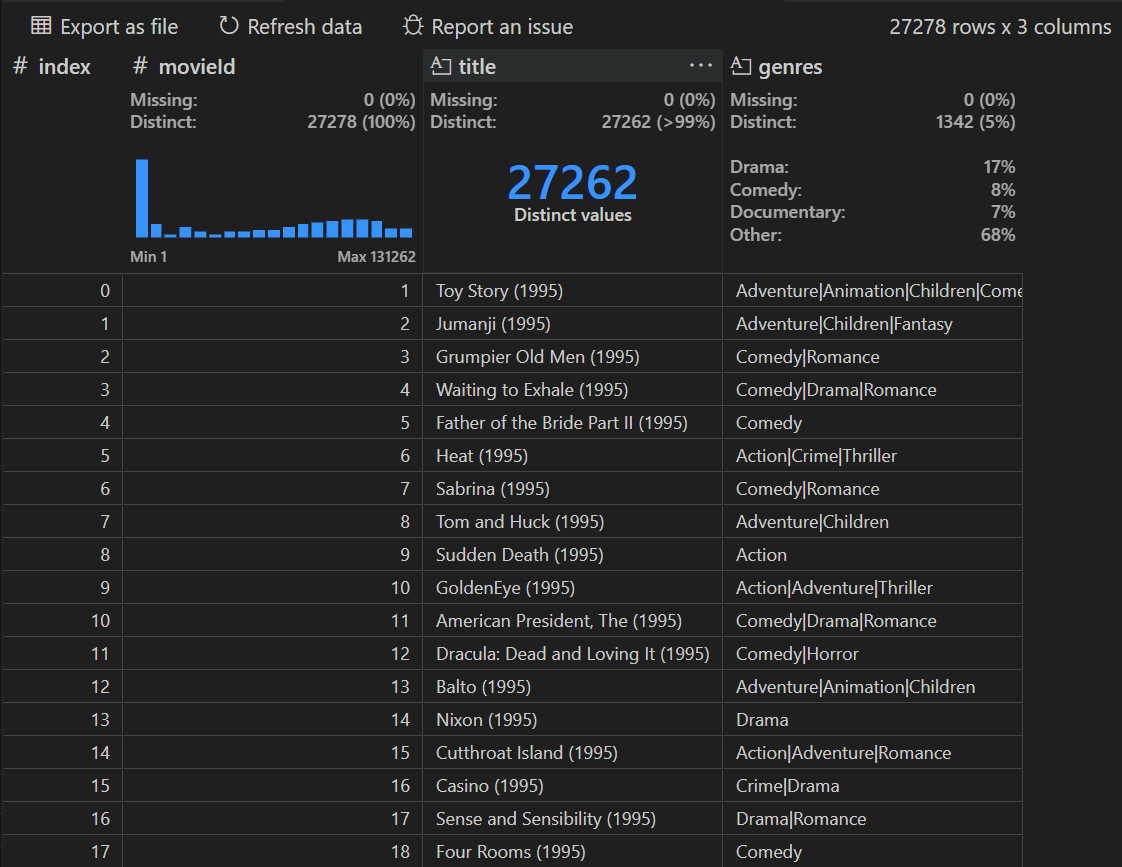

In [4]:
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [5]:
movie_df.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [6]:
movie_df.shape

(27278, 3)

<p> movie dataset consists of <strong>27,278</strong> rows and <strong>3</strong> columns </p>
<ul>
    <li><strong> movieId </strong>: int </li>
    <li><strong> title </strong>: object </li>
    <li><strong> genres </strong>: object </li>
</ul>

In [7]:
movie_df.head(7)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance


In [9]:
ratings_df = pd.read_csv("./dataset/rating.csv")

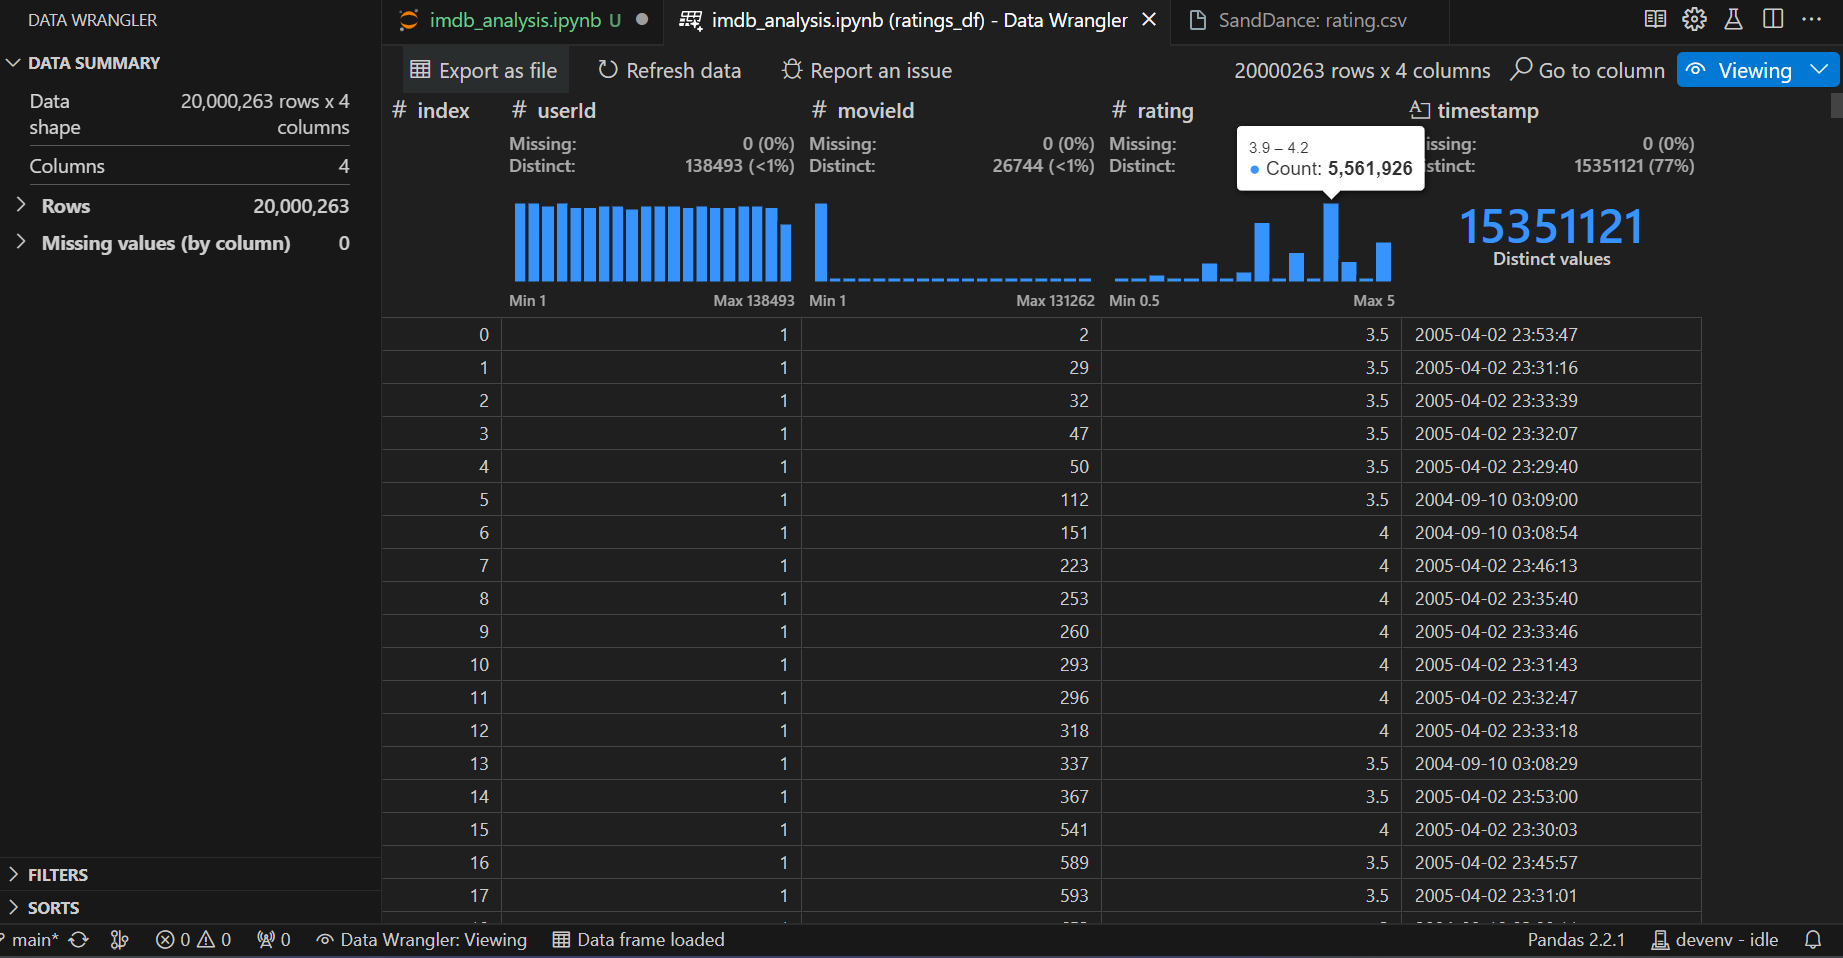

In [10]:
ratings_df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [11]:
ratings_df.shape

(20000263, 4)

<p>dataset contains: <strong>2,00,00,263</strong> rows and <strong>4</strong> columns
<ul>
    <li>userId</li>
    <li>movieId</li>
    <li>rating</li>
    <li>timestamp</li>
</ul>

In [12]:
# not required
del ratings_df['timestamp']

In [13]:
# sub-setting data
ratings_df['rating'] > 5

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool

In [17]:
ratings_df[ratings_df['rating'] < 5].head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [38]:
filtered_ratings_df = ratings_df[ratings_df['rating'] < 5]

merged_df = pd.merge(filtered_ratings_df, movie_df, on='movieId')
merged_df[['title', 'rating']].head(20)

,title,rating
0,Jumanji (1995),3.5
1,"City of Lost Children, The (Cité des enfants p...",3.5
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.5
3,Seven (a.k.a. Se7en) (1995),3.5
4,"Usual Suspects, The (1995)",3.5
5,Rumble in the Bronx (Hont faan kui) (1995),3.5
6,Rob Roy (1995),4.0
7,Clerks (1994),4.0
8,Interview with the Vampire: The Vampire Chroni...,4.0
9,Star Wars: Episode IV - A New Hope (1977),4.0


<p> these are the <strong>top 20</strong> movies having ratings below <strong>5</strong></p>

In [58]:
filtered_ratings_df = ratings_df[ratings_df['rating'] >= 5]

merged_df = pd.merge(filtered_ratings_df, movie_df, on='movieId')
merged_df[['title', 'rating']].head(20)

,title,rating
0,"Lord of the Rings: The Fellowship of the Ring,...",5.0
1,"Lord of the Rings: The Two Towers, The (2002)",5.0
2,"Lord of the Rings: The Return of the King, The...",5.0
3,Freaks (1932),5.0
4,Mr. Holland's Opus (1995),5.0
5,From Dusk Till Dawn (1996),5.0
6,Star Wars: Episode IV - A New Hope (1977),5.0
7,Legends of the Fall (1994),5.0
8,Jurassic Park (1993),5.0
9,Blade Runner (1982),5.0


In [42]:
filtered_ratings_df = ratings_df[ratings_df['rating'] < 5]
grouped_ratings_df = filtered_ratings_df.groupby('movieId').count()

top_10_asc = grouped_ratings_df.sort_values(by='rating', ascending=True).head(10)
print(top_10_asc)

         userId  rating
movieId                
131262        1       1
106729        1       1
106725        1       1
106704        1       1
106702        1       1
106686        1       1
106682        1       1
106672        1       1
106648        1       1
106618        1       1


In [41]:
filtered_ratings_df = ratings_df[ratings_df['rating'] < 5]
grouped_ratings_df = filtered_ratings_df.groupby('movieId').count()

top_10_desc = grouped_ratings_df.sort_values(by='rating', ascending=False).head(10)
print(top_10_desc)

         userId  rating
movieId                
480       49475   49475
356       44880   44880
592       42659   42659
780       40836   40836
593       40786   40786
296       39548   39548
589       38927   38927
380       37730   37730
457       37454   37454
1         37427   37427


In [43]:
tag_df = pd.read_csv("./dataset/tag.csv")

In [44]:
tag_df

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


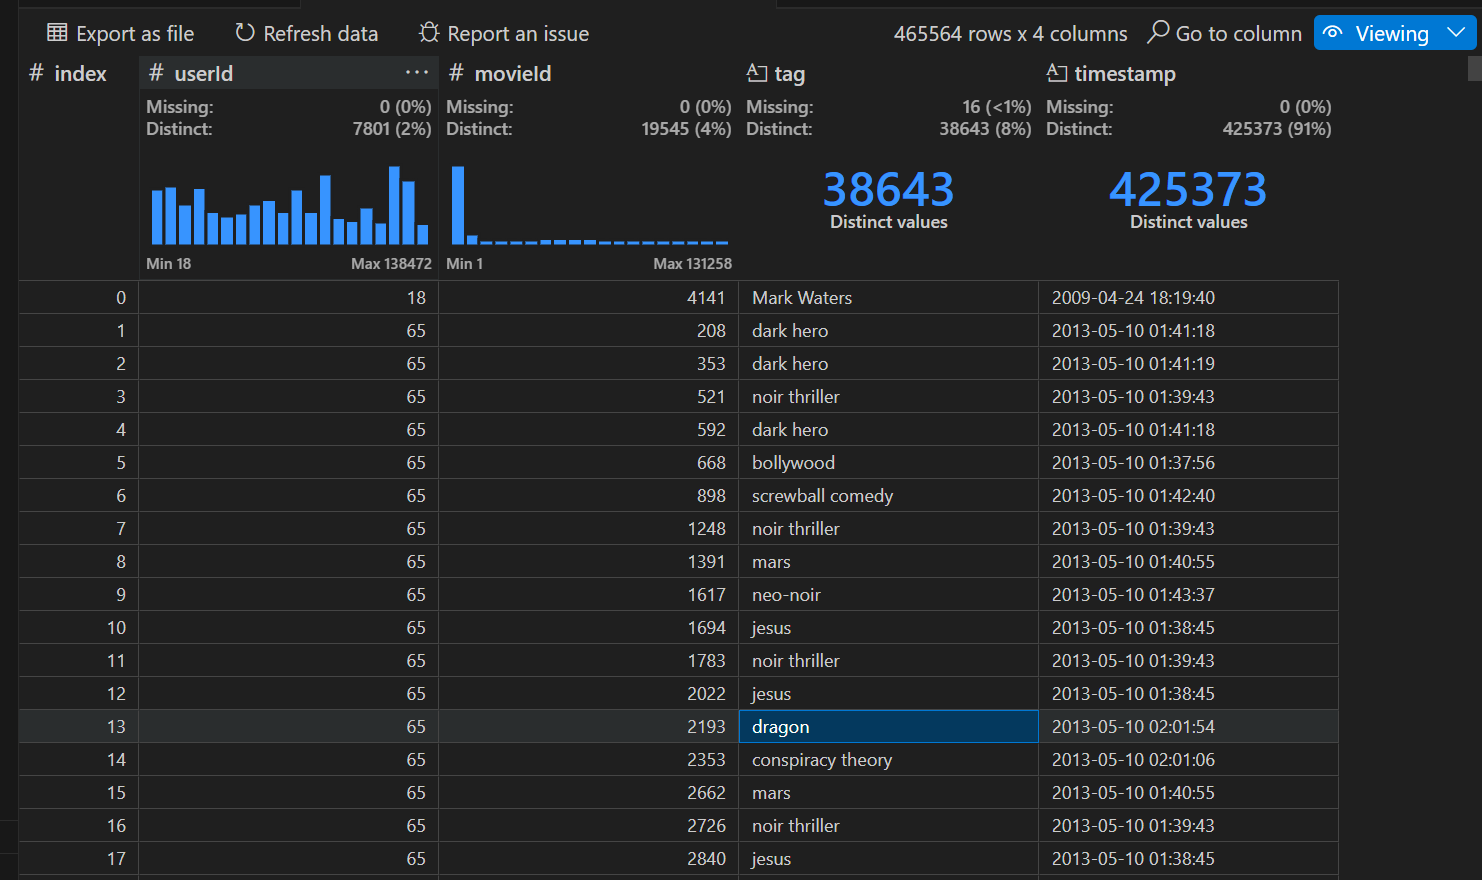

<p>all total there are 16 missing values in the <strong>tag</strong> column which is < 1% </p>

In [45]:
tag_df.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [46]:
# removing timestamp column as it is not required
del tag_df['timestamp']

In [47]:
tag_df

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [48]:
# some basic formatting
tag_df['tag'] = tag_df['tag'].str.capitalize()

In [49]:
tag_df

,userId,movieId,tag
0,18,4141,Mark waters
1,65,208,Dark hero
2,65,353,Dark hero
3,65,521,Noir thriller
4,65,592,Dark hero
...,...,...,...
465559,138446,55999,Dragged
465560,138446,55999,Jason bateman
465561,138446,55999,Quirky
465562,138446,55999,Sad


In [55]:
filtered_tag_df = tag_df[tag_df['tag'] == 'Bollywood']

In [66]:
filtered_tag_df.head(10)

,userId,movieId,tag
5,65,668,Bollywood
19,65,5135,Bollywood
30,65,51884,Bollywood
1970,910,6683,Bollywood
7858,1741,6683,Bollywood
11342,2001,5135,Bollywood
11352,2001,51884,Bollywood
27804,6500,56167,Bollywood
30484,7434,6683,Bollywood
31520,7671,5135,Bollywood
